Based on [this Medium tutorial](https://medium.com/towards-data-science/animating-viral-spread-in-python-b4a5b5dfbf6e) by Ford Combs

In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import random
import numpy as np
from scipy.spatial import Delaunay
from matplotlib.lines import Line2D

In [2]:
# Given a number of steps (n) and an R0 value (r),
# calculate number of infections at each step
def calc_y(n,r):
  # np.random.normal(mean, standard deviation, sample size)
  # returns 1 sample from a normal distribution with a mean of R0,
  # so a is a list of plausible R0 values at each step
  a = [max(0,int(np.random.normal(r,1,1))) for i in range(0,n)]
  # b will hold the number of infections at each step
  b = []
  for i in range(len(a)):
    # begin with 1 infection at step 1
    if i == 0:
      b.append(1)
    # after step 1, the number of infections = (the number of infections
    # at the previous step * the R0 computed above) + the number of infections 
    # at the previous step
    else:
      b.append((a[i] * b[-1])+b[-1])
  return b

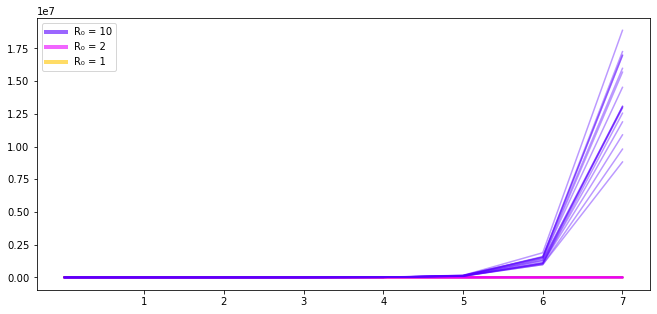

In [6]:
# initialize the figure
fig = plt.figure(figsize=(11,5))
# n is the number of steps
n = 8
x = list(np.arange(0,n))
# this is the function used to create the animation
# the i value will be a range up to the number of frames
# that will be set in FuncAnimation
def animation_func(i):
  # plt.yscale('log') ## Uncomment to use a log scale on the y axis
  # for the final fifteen lines, use r0 = 10
  if i+1 >= 30:
    plt.plot(x,calc_y(n,10),color='#5800FF',alpha=0.4,label='R0=10')
  # for the second fifteen lines, use r0 = 2
  elif i+1 >= 15:
    plt.plot(x,calc_y(n,2),color='#E900FF',alpha=0.4,label='R0=2') #r=2
  # for the first fifteen lines, use r0 = 1 
  else:
    plt.plot(x,calc_y(n,1),color='#FFC600',alpha=0.4,label='R0=1') #r=1
# here we call FuncAnimation() and pass in the fig, the animation function, 
# and the number of frames 
ani = FuncAnimation(fig, animation_func,frames = 45)
# create a custom legend with three lines
custom_lines = [Line2D([0], [0], color='#5800FF', lw=4,alpha=0.6),
                Line2D([0], [0], color='#E900FF', lw=4,alpha=0.6),
                Line2D([0], [0], color='#FFC600', lw=4,alpha=0.6)]
plt.legend(custom_lines, ['R₀ = 10','R₀ = 2', 'R₀ = 1']) #['R₀ = 10', 'R₀ = 2', 'R₀ = 1'])
# customize the x ticks
plt.xticks([e+1 for e in x])
# save the GIF using 3 frames per second
ani.save('line_graph.gif', writer='imagemagick', fps=3)

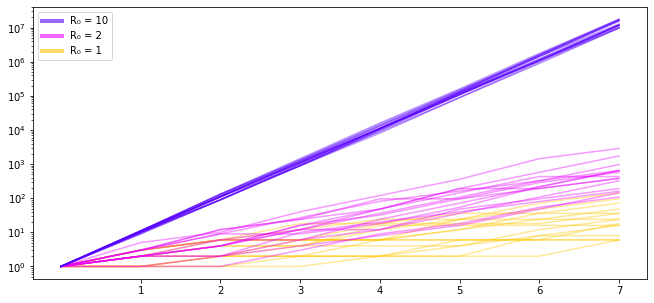

In [5]:
# initialize the figure
fig = plt.figure(figsize=(11,5))
# n is the number of steps
n = 8
x = list(np.arange(0,n))
# this is the function used to create the animation
# the i value will be a range up to the number of frames
# that will be set in FuncAnimation
def animation_func(i):
  plt.yscale('log') ## Uncomment to use a log scale on the y axis
  # for the final fifteen lines, use r0 = 10
  if i+1 >= 30:
    plt.plot(x,calc_y(n,10),color='#5800FF',alpha=0.4,label='R0=10')
  # for the second fifteen lines, use r0 = 2
  elif i+1 >= 15:
    plt.plot(x,calc_y(n,2),color='#E900FF',alpha=0.4,label='R0=2') #r=2
  # for the first fifteen lines, use r0 = 1 
  else:
    plt.plot(x,calc_y(n,1),color='#FFC600',alpha=0.4,label='R0=1') #r=1
# here we call FuncAnimation() and pass in the fig, the animation function, 
# and the number of frames 
ani = FuncAnimation(fig, animation_func,frames = 45)
# create a custom legend with three lines
custom_lines = [Line2D([0], [0], color='#5800FF', lw=4,alpha=0.6),
                Line2D([0], [0], color='#E900FF', lw=4,alpha=0.6),
                Line2D([0], [0], color='#FFC600', lw=4,alpha=0.6)]
plt.legend(custom_lines, ['R₀ = 10','R₀ = 2', 'R₀ = 1']) #['R₀ = 10', 'R₀ = 2', 'R₀ = 1'])
# customize the x ticks
plt.xticks([e+1 for e in x])
# save the GIF using 3 frames per second
ani.save('log_line_graph.gif', writer='imagemagick', fps=3)

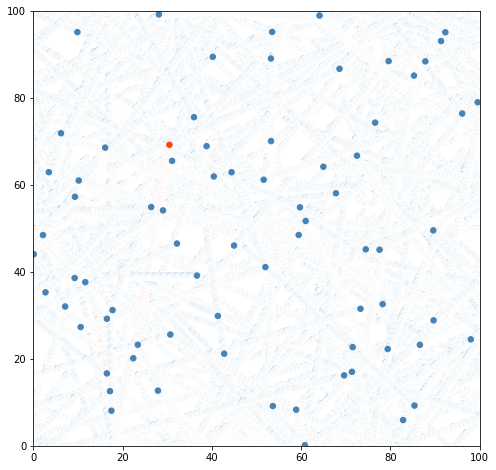

In [7]:
# Initialize values for each point
positions = []
state = []
velocities = []
n = 75
n_area = 100
for i in range(n):
  # Position each point on the plane from 0 to 100
  positions.append([np.random.uniform(0,100),np.random.uniform(0,100)])
  # Set each point's state to healthy (steelblue)
  state.append('steelblue')
  # Give each point some velocity
  velocities.append([np.random.uniform(-1,1),np.random.uniform(-1,1)])

# Randomly select one point to be infected (orangered)
i = random.randint(0,n-1)
state[i] = 'orangered'
# This is the animation function
def animation_func(i):
  # This section whites out the previous point positions with transparency
  # Pull out the XY values for each point 
  x = [e[0] for e in positions]
  y = [e[1] for e in positions] 
  plt.xlim(0,n_area)
  plt.ylim(0,n_area)
  # Plot each point with a large, semi-transparent point
  # This will give the illusion of trails as the points move
  plt.scatter(x,y,c='white',s=60,alpha=0.95)
  # Loop through each point
  for j in range(n):
    # Update the position by adding the velocity
    positions[j] = [positions[j][k]+velocities[j][k] for k in range(2)]
    # If approaching border, then reverse direction, i.e., bounce
    # To allow the points to pass through the walls and appear on the 
    # opposite side, uncomment the 4 lines like "positions[j][0] -= n_area"
    # and comment the 4 lines like "velocities[j] = [-1*velocities[j][0],velocities[j][1]]"
    if positions[j][0] > n_area:
      # positions[j][0] -= n_area
      velocities[j] = [-1*velocities[j][0],velocities[j][1]]
    elif positions[j][0] < 0:
      # positions[j][0] += n_area
      velocities[j] = [-1*velocities[j][0],velocities[j][1]]
    if positions[j][1] > n_area:
      # positions[j][1] -= n_area
      velocities[j] = [velocities[j][0],-1*velocities[j][1]]
    elif positions[j][1] < 0:
      # positions[j][1] += n_area
      velocities[j] = [velocities[j][0],-1*velocities[j][1]]
  # Pull out the XY values for each point
  x = [e[0] for e in positions]
  y = [e[1] for e in positions] 
  plt.xlim(0,n_area)
  plt.ylim(0,n_area)
  # Plot each point
  plt.scatter(x, y, c = state,s=30)

# Initialize the figure
fig = plt.figure(figsize=(8,8))  
# Call the animation function with 192 frames, (24 * 8)
# This means def animation_func(i) will run 192 times
ani = FuncAnimation(fig, animation_func,frames = 192)
# Save the animation as a gif with 24 frames per second with imagemagick
ani.save('nowall_nospread.gif', writer='imagemagick', fps=24)